In [1]:
import github3, json

import os
from datetime import date
import dateutil.relativedelta

import pandas as pd                                    # panda's nickname is pd

import numpy as np                                     # numpy as np

from pandas import DataFrame, Series                   # for convenience

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd


from fbprophet import Prophet

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

import tensorflow as tf
from tensorflow.contrib.timeseries.python.timeseries import  NumpyReader
import time

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/anaconda3/lib/p

In [47]:
GITHUB_TOKEN = '1f06cf76a61a667e13acb23887c0c10e975465e7'
ORG = 'YFA19SCM50H'                  
REPO ='YFA19SCM50H'
FILENAME_ISSUES = REPO + 'Tests.json'
gh = github3.login(token=GITHUB_TOKEN)
repo = 'repo:angular/material'

In [4]:
f = open('angular_material.json', 'w')
f.close()


today = date.today()

# since github3 api support max 1000 issue for search, 
# we use a loop to get issues for every month for the past 24 months

for i in range(24):
        
        f = open(FILENAME_ISSUES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:issue'
        #repo = 'repo:angular/angular'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(2)
            

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'sear

In [96]:
FILENAME_ISSUES = 'angular_material.json'
issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
df = DataFrame(issues)
df.tail()

457

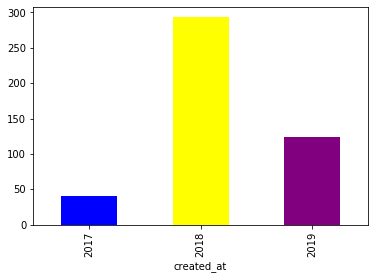

In [8]:
#4 A Bar Chart to plot the starts for every Repo
year = pd.DatetimeIndex(df['created_at']).year
a = df['created_at'].groupby(by=[year]).count()
a.plot(kind='bar',stacked=True,  color=['blue','yellow', 'purple'], grid=False)

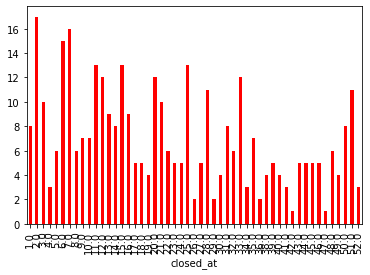

In [9]:
#6) A Bar Chart to plot the issues closed for every week for every Repo
week = pd.DatetimeIndex(df['closed_at']).week
a = DataFrame(week)
tmp = a.groupby(['closed_at']).closed_at.count()
tmp.plot(kind='bar',  color=['red'], grid=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


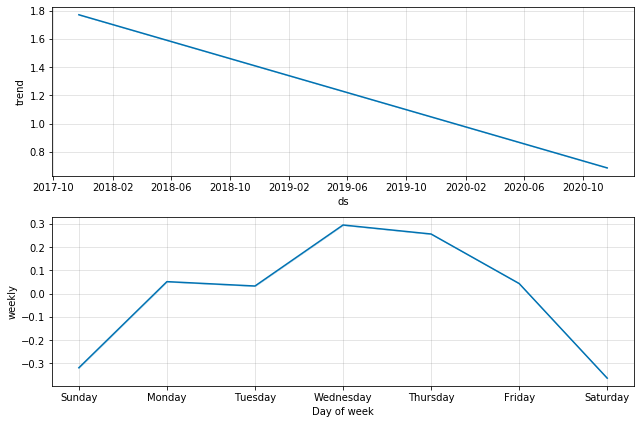

In [44]:
#8 1) The day of the week maximum number of issues created
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet()
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

### The day of the week maximum number of issues created is wednesday

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


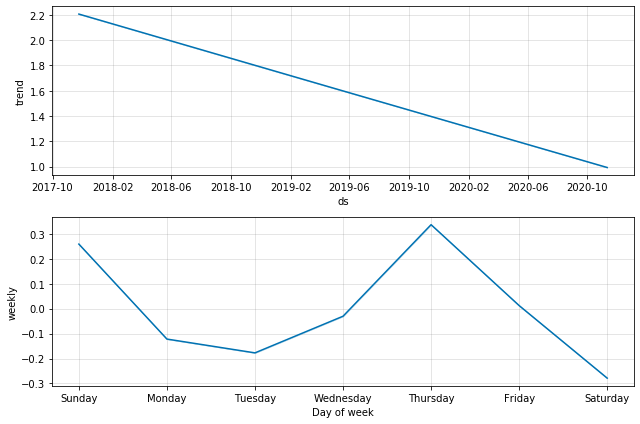

In [45]:
#2) The day of the week maximum number of issues closed
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet()
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

### The day of the week maximum number of issues closed is Thursday

In [34]:
# 3) The month of the year that has maximum number of issues closed
maxmon = []
c = forecast['yhat'][i]
for i in range(len(forecast)-1):
    if forecast['ds'][i].month != forecast['ds'][i+1].month:
        maxmon.append(c)
        c = 0
    c += forecast['yhat'][i+1]
print(maxmon.index(max(maxmon[0:2]))+11)
print(maxmon.index(max(maxmon[2:14]))-1)
print(maxmon.index(max(maxmon[14:26]))-24)
print(maxmon.index(max(maxmon[26:36]))-25)
print("The month of the year that has maximum number of issues closed are January")

12
1
1
1
The month of the year that has maximum number of issues closed are January


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


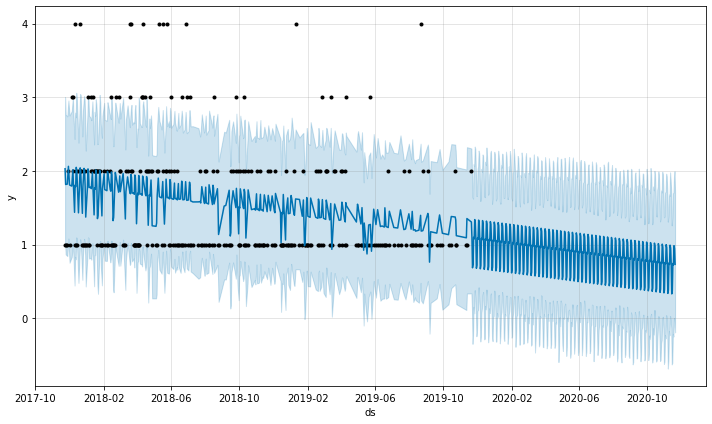

In [37]:
#4 Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet()
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forcast_fig1 = m.plot(forecast)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



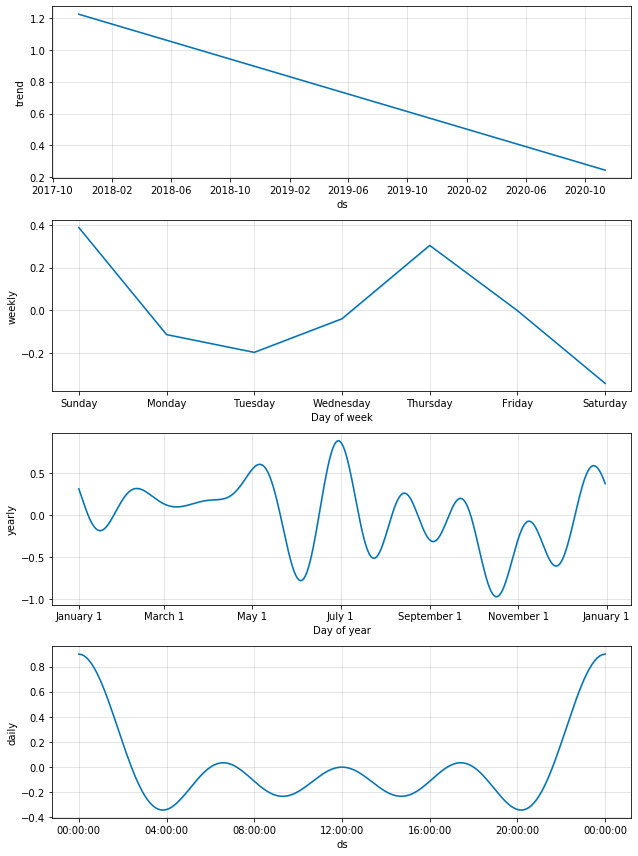

In [42]:
#5)Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [52]:
#6. Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly
ORG = 'angular'                  
REPO ='materials'
FILENAME_PULL = REPO + 'pull.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_PULL, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_PULL, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:pr'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)
FILENAME_PULL = REPO + 'pull.json'
pull = [json.loads(line) for line in open(FILENAME_PULL)]
df_pull = DataFrame(pull)
#df_pull.columns     

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com'

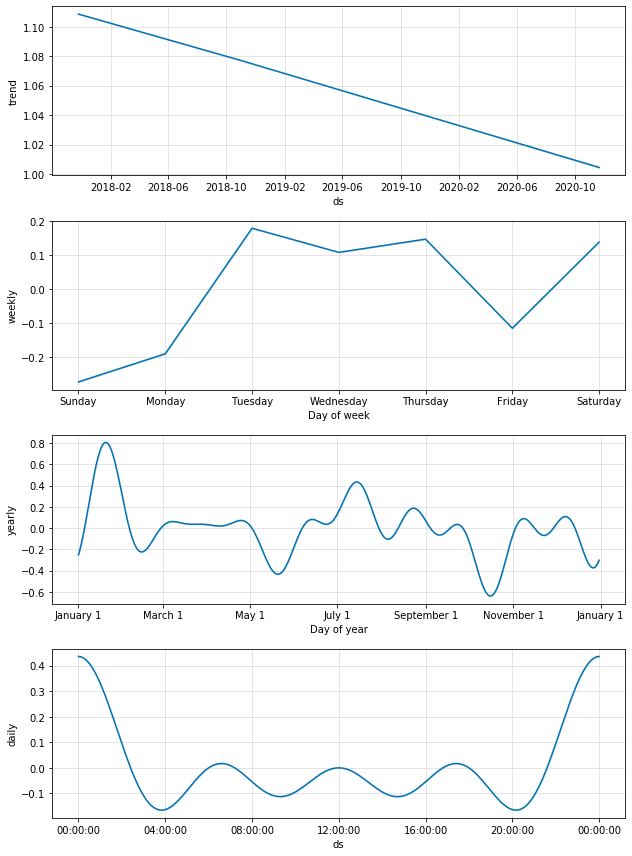

In [58]:
a = df_pull[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [59]:
#7. Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
ORG = 'angular'                  
REPO ='materals'
FILENAME_COMMITS = REPO + 'commits.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_COMMITS, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_COMMITS, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:commits'
        repo = 'repo:angular/material'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)
#df_pull.columns     

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com'

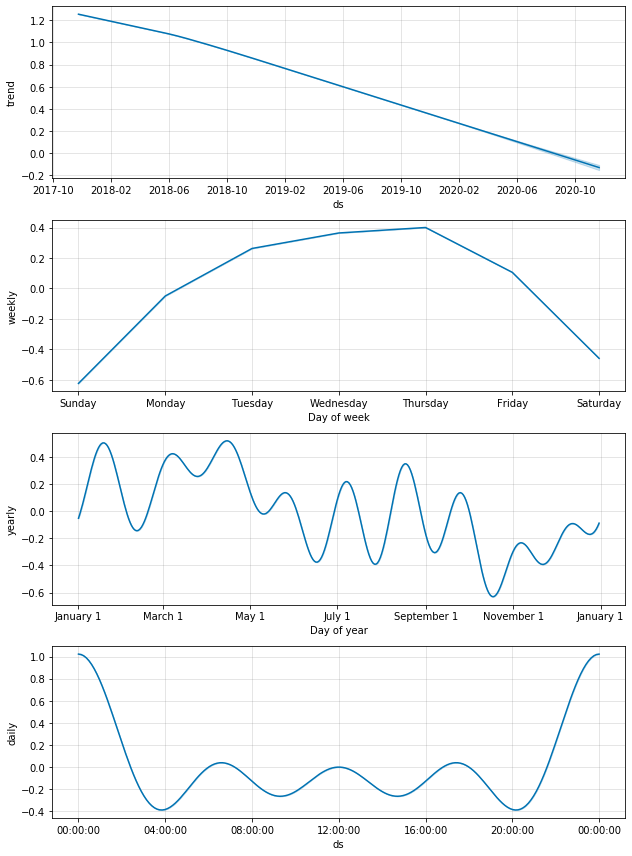

In [61]:
FILENAME_COMMITS = REPO + 'commits.json'
commits = [json.loads(line) for line in open(FILENAME_COMMITS)]
df_commits = DataFrame(commits)
a = df_commits[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [62]:
# 8. Plot the branches forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
ORG = 'angular'                  
REPO ='angular'
FILENAME_BRANCHES = REPO + 'branches.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_BRANCHES, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_BRANCHES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:branches'
        repo = 'repo:angular/material'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com'

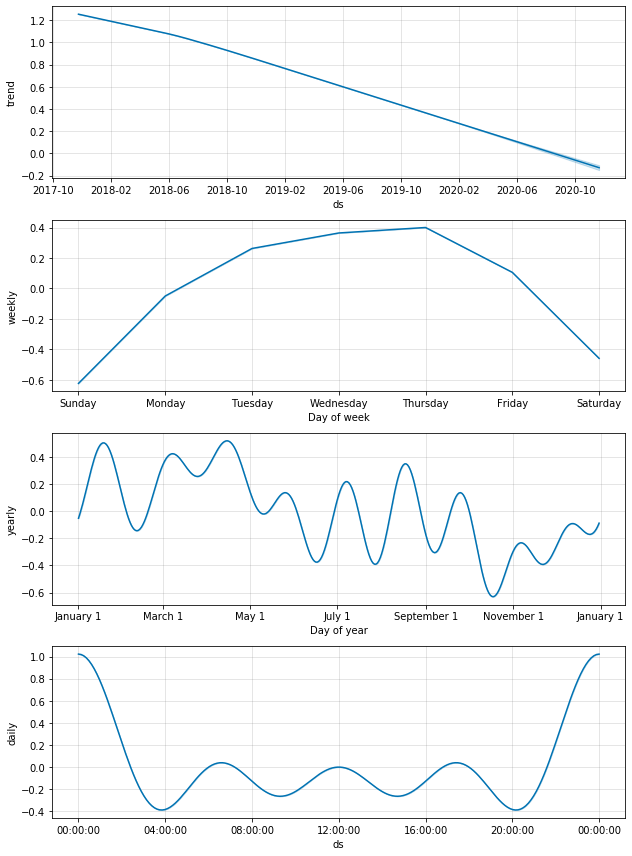

In [63]:
FILENAME_BRANCHES = REPO + 'branches.json'
branches = [json.loads(line) for line in open(FILENAME_BRANCHES)]
df_branches= DataFrame(branches)
a = df_branches[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [64]:
#9. Plot the contributors forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
ORG = 'angular'                  
REPO ='angular'
FILENAME_CONTRIBUTORS = REPO + 'contributors.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_CONTRIBUTORS, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_CONTRIBUTORS, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:branches'
        repo = 'repo:angular/material'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com'

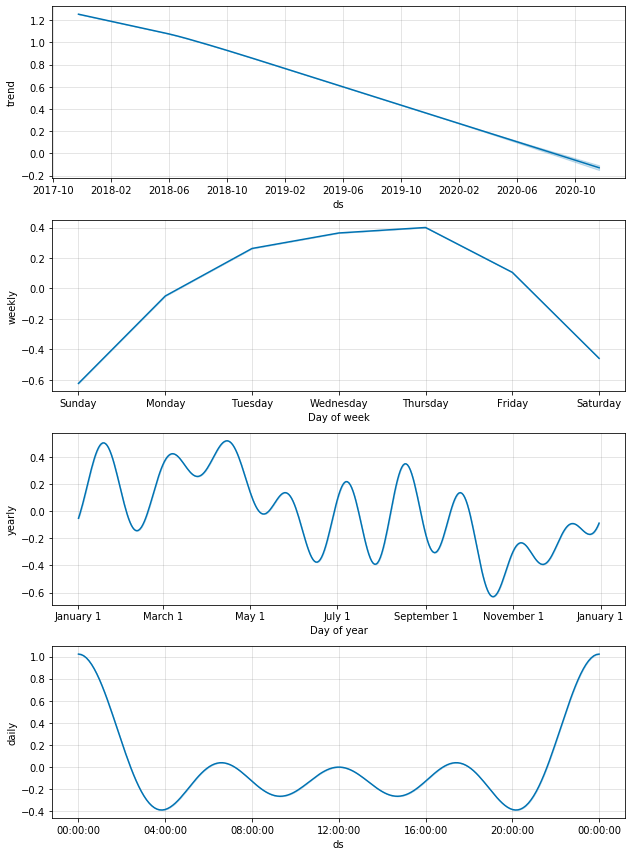

In [66]:
FILENAME_CONTRIBUTORS = REPO + 'contributors.json'
contributors = [json.loads(line) for line in open(FILENAME_CONTRIBUTORS)]
df_contributors= DataFrame(contributors)
a = df_contributors[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

In [67]:
#10. Plot the releases forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.
ORG = 'angular'                  
REPO ='angular'
FILENAME_RELEASES = REPO + 'releases.json'
gh = github3.login(token=GITHUB_TOKEN)
f = open(FILENAME_RELEASES, 'w')
f.close()
today = date.today()
for i in range(24):
        
        f = open(FILENAME_RELEASES, 'a')
        
        last_month = today + dateutil.relativedelta.relativedelta(months = -1)
        types = 'type:releases'
        repo = 'repo:angular/material'
        ranges = 'created:' + str(last_month) + '..' + str(today)
        search_query = types + ' ' + repo + ' ' + ranges
        for issue in gh.search_issues(search_query):
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)                                     
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
            
        f.close()
        today = last_month
        time.sleep(1)

INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:root:JSON was returned
INFO:root:Building a url from ('https://api.github.com'

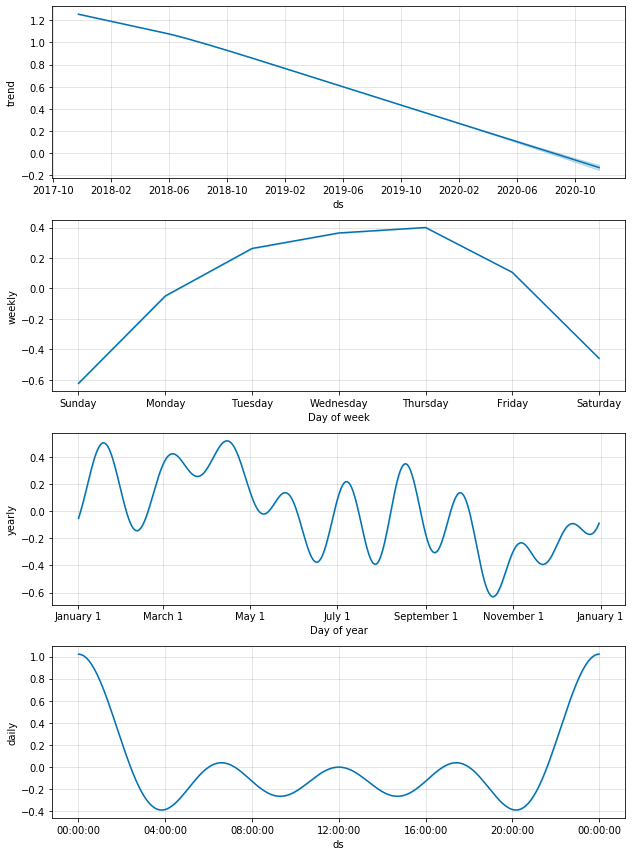

In [69]:
FILENAME_RELEASES = REPO + 'releases.json'
releases = [json.loads(line) for line in open(FILENAME_RELEASES)]
df_releases= DataFrame(releases)
a = df_releases[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
m = Prophet(yearly_seasonality=True,daily_seasonality=True)
m.fit(b)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
f = m.plot_components(forecast)

### TENSORFLOW

### 1. The day of the week maximum number of issues created

In [70]:
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpj_8jwpii', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c3a0a9ef0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Va

{'times': array([1.5114168e+09, 1.5115032e+09, 1.5117624e+09, 1.5119352e+09,
       1.5121080e+09, 1.5124536e+09, 1.5126264e+09, 1.5127128e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5134904e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140952e+09, 1.5141816e+09, 1.5143544e+09,
       1.5144408e+09, 1.5145272e+09, 1.5146136e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5153912e+09,
       1.5154776e+09, 1.5156504e+09, 1.5157368e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 1.5166872e+09,
       1.5167736e+09, 1.5168600e+09, 1.5169464e+09, 1.5171192e+09,
       1.5172056e+09, 1.5174648e+09, 1.5175512e+09, 1.5178968e+09,
       1.5179832e+09, 1.5180696e+09, 1.5184152e+09, 1.5185016e+09,
       1.5185880e+09, 1.5186744e+09, 1.5187608e+09, 1.5188472e+09,
       1.5189336e+09, 1.5191928e+09, 1.5192792e+09, 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpj_8jwpii/model.ckpt.
INFO:tensorflow:loss = 1.4690942, step = 1
INFO:tensorflow:global_step/sec: 276.135
INFO:tensorflow:loss = 1.2631222, step = 101 (0.364 sec)
INFO:tensorflow:global_step/sec: 152.351
INFO:tensorflow:loss = 1.2305576, step = 201 (0.656 sec)
INFO:tensorflow:global_step/sec: 158.277
INFO:tensorflow:loss = 1.2663051, step = 301 (0.632 sec)
INFO:tensorflow:global_step/sec: 152.779
INFO:tensorflow:loss = 1.1849662, step = 401 (0.654 sec)
INFO:tensorflow:global_step/sec: 161.556
INFO:tensorflow:loss = 1.190747, step = 501 (0.619 sec)
INFO:tensorflow:global_step/sec: 165.594
INFO:tensorflow:loss =

In [72]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-24T19:04:16Z


INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpj_8jwpii/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-19:04:21
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2189838, covariance = [[[4.38109934e-01]
  [2.71342163e+01]
  [3.57400239e-01]
  [1.08646154e+00]
  [8.27147737e-02]
  [1.35656416e-01]
  [3.51685584e-01]
  [1.8692539

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [74]:
maxdays = []
a = datetime.utcfromtimestamp(predictions['times'][1]).isocalendar()[1]
for i in range(len(predictions['times'])-1):
    a = datetime.utcfromtimestamp(predictions['times'][i]).isocalendar()[1]
    b = datetime.utcfromtimestamp(predictions['times'][i+1]).isocalendar()[1]
    if predictions['mean'][i]>predictions['mean'][i+1]:
        flag = i
    if a != b:
        maxdays.append(flag)
        flag = i

print("The day of the week maximum number of issues created is Wednesday")

The day of the week maximum number of issues created is Wednesday


### 2. The day of the week maximum number of issues closed

In [54]:
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmppmrx8vl8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c43560dd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5116760e+09, 1.5117624e+09, 1.5118488e+09,
       1.5119352e+09, 1.5120216e+09, 1.5121080e+09, 1.5121944e+09,
       1.5122808e+09, 1.5123672e+09, 1.5124536e+09, 1.5125400e+09,
       1.5126264e+09, 1.5127128e+09, 1.5127992e+09, 1.5128856e+09,
       1.5129720e+09, 1.5130584e+09, 1.5131448e+09, 1.5132312e+09,
       1.5133176e+09, 1.5135768e+09, 1.5136632e+09, 1.5137496e+09,
       1.5138360e+09, 1.5139224e+09, 1.5140088e+09, 1.5140952e+09,
       1.5141816e+09, 1.5142680e+09, 1.5143544e+09, 1.5144408e+09,
       1.5145272e+09, 1.5146136e+09, 1.5147000e+09, 1.5147864e+09,
       1.5148728e+09, 1.5149592e+09, 1.5150456e+09, 1.5151320e+09,
       1.5152184e+09, 1.5153048e+09, 1.5153912e+09, 1.5154776e+09,
       1.5155640e+09, 1.5156504e+09, 1.5157368e+09, 1.5158232e+09,
       1.5159096e+09, 1.5159960e+09, 1.5160824e+09, 1.5161688e+09,
       1.5162552e+09, 1.5163416e+09, 1.5164280e+09, 1.5166008e+09,
       1.5166872e+09, 1.5167736e+09, 1.5168600e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmppmrx8vl8/model.ckpt.
INFO:tensorflow:loss = 1.5465304, step = 1
INFO:tensorflow:global_step/sec: 240.059
INFO:tensorflow:loss = 1.2883254, step = 101 (0.418 sec)
INFO:tensorflow:global_step/sec: 164.145
INFO:tensorflow:loss = 1.3385584, step = 201 (0.609 sec)
INFO:tensorflow:global_step/sec: 178.246
INFO:tensorflow:loss = 1.2776519, step = 301 (0.561 sec)
INFO:tensorflow:global_step/sec: 183.457
INFO:tensorflow:loss = 1.2587172, step = 401 (0.545 sec)
INFO:tensorflow:global_step/sec: 184.506
INFO:tensorflow:loss = 1.237988, step = 501 (0.542 sec)
INFO:tensorflow:global_step/sec: 174.283
INFO:tensorflow:loss = 1.2706716, step = 601 (0.573 sec)
INFO:tensorflow:global_step/sec: 182.087
INFO:tensorflow:loss = 1.2310804, step = 701 (0.549 sec)
INFO:tensorflow:global_step/sec: 

In [73]:
evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-11-24T16:44:30Z


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmppmrx8vl8/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-16:44:42
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2455937, covariance = [[[ 68.98365  ]
  [ 51.10546  ]
  [ 44.26738  ]
  [ 74.65379  ]
  [ 42.215664 ]
  [ 64.38493  ]
  [ 57.78762  ]
  [ 38.849625 ]
  [135.54681  ]
  [ 76.48565  ]
  [ 18.941778 ]
  [ 47.70832  ]
  [  8.545189 ]
  [ 54.267082 ]
  [102.5

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [75]:
maxdays = []
a = datetime.utcfromtimestamp(predictions['times'][1]).isocalendar()[1]
for i in range(len(predictions['times'])-1):
    a = datetime.utcfromtimestamp(predictions['times'][i]).isocalendar()[1]
    b = datetime.utcfromtimestamp(predictions['times'][i+1]).isocalendar()[1]
    if predictions['mean'][i]>predictions['mean'][i+1]:
        flag = i
    if a != b:
        maxdays.append(flag)
        flag = i

print("The day of the week maximum number of issues closed is Thursday")

The day of the week maximum number of issues closed is Thursday


### 3. The month of the year that has maximum number of issues closed

In [78]:
maxmoon = []
a = datetime.utcfromtimestamp(predictions['times'][1]).isocalendar()[1]
for i in range(len(predictions['times'])-1):
    a = datetime.utcfromtimestamp(predictions['times'][i]).isocalendar()[1]
    b = datetime.utcfromtimestamp(predictions['times'][i+1]).isocalendar()[1]
    if predictions['mean'][i]>predictions['mean'][flag]:
        flag = i
    if a != b:
        maxdays.append(flag)
        flag = i
print(maxmon.index(max(maxmon[0:2]))+11)
print(maxmon.index(max(maxmon[2:14]))-1)
print(maxmon.index(max(maxmon[14:26]))-24)
print(maxmon.index(max(maxmon[26:36]))-25)
print("The month of the year that has maximum number of issues closed are January")

12
1
1
1
The month of the year that has maximum number of issues closed are January


### 4. Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp0x6mncnd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_se

{'times': array([1.5114168e+09, 1.5115032e+09, 1.5117624e+09, 1.5119352e+09,
       1.5121080e+09, 1.5124536e+09, 1.5126264e+09, 1.5127128e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5134904e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140952e+09, 1.5141816e+09, 1.5143544e+09,
       1.5144408e+09, 1.5145272e+09, 1.5146136e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5153912e+09,
       1.5154776e+09, 1.5156504e+09, 1.5157368e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 1.5166872e+09,
       1.5167736e+09, 1.5168600e+09, 1.5169464e+09, 1.5171192e+09,
       1.5172056e+09, 1.5174648e+09, 1.5175512e+09, 1.5178968e+09,
       1.5179832e+09, 1.5180696e+09, 1.5184152e+09, 1.5185016e+09,
       1.5185880e+09, 1.5186744e+09, 1.5187608e+09, 1.5188472e+09,
       1.5189336e+09, 1.5191928e+09, 1.5192792e+09, 

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp0x6mncnd/model.ckpt.
INFO:tensorflow:loss = 1.5225644, step = 1
INFO:tensorflow:global_step/sec: 246.649
INFO:tensorflow:loss = 1.2035323, step = 101 (0.406 sec)
INFO:tensorflow:global_step/sec: 166.29
INFO:tensorflow:loss = 1.2045147, step = 201 (0.602 sec)
INFO:tensorflow:global_step/sec: 173.586
INFO:tensorflow:loss = 1.2337412, step = 301 (0.575 sec)
INFO:tensorflow:global_step/sec: 168.673
INFO:tensorflow:loss = 1.2399307, step = 401 (0.593 sec)
INFO:tensorflow:global_step/sec: 169.814
INFO:tensorflow:loss = 1.1922634, step = 501 (0.589 sec)
INFO:tensorflow:global_step/sec: 163.199
INFO:tensorflow:loss = 1.219659, step = 601 (0.612 sec)
INFO:tensorflow:global_step/sec: 179.084
INFO:tensorflow:loss = 1.2394651, step = 701 (0.558 sec)
INFO:tensorflow:global_step/sec: 1

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp0x6mncnd/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-19:07:15
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.20637, covariance = [[[4.67485130e-01]
  [2.62406902e+01]
  [4.06532645e-01]
  [1.07486880e+00]
  [8.06330070e-02]
  [1.25035822e-01]
  [4.37442631e-01]
  [1.77116066e-01]
  [1.05499709e+00]
  [1.23454833e+00]
  [4.74014968e-01]
  [3.89497340e-01]
  [8.2

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp0x6mncnd/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


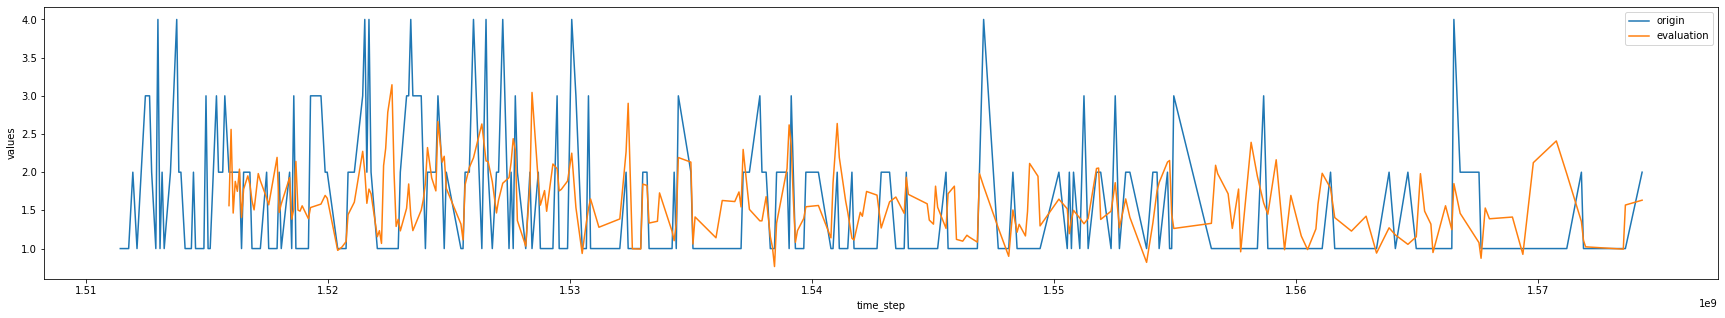

In [79]:
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

plt.figure(figsize=(30, 5))
plt.plot(data['times'].reshape(-1), data['values'].reshape(-1), label='origin')
plt.plot(evaluation['times'].reshape(-1), evaluation['mean'].reshape(-1), label='evaluation')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 5. Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [80]:
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpoz6p__87', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_se

{'times': array([1.5115032e+09, 1.5117624e+09, 1.5118488e+09, 1.5128856e+09,
       1.5131448e+09, 1.5138360e+09, 1.5143544e+09, 1.5151320e+09,
       1.5155640e+09, 1.5156504e+09, 1.5158232e+09, 1.5159096e+09,
       1.5160824e+09, 1.5161688e+09, 1.5163416e+09, 1.5164280e+09,
       1.5165144e+09, 1.5166008e+09, 1.5167736e+09, 1.5169464e+09,
       1.5172056e+09, 1.5180696e+09, 1.5183288e+09, 1.5184152e+09,
       1.5185016e+09, 1.5189336e+09, 1.5191064e+09, 1.5196248e+09,
       1.5197112e+09, 1.5198840e+09, 1.5202296e+09, 1.5208308e+09,
       1.5211764e+09, 1.5216084e+09, 1.5216948e+09, 1.5217812e+09,
       1.5219540e+09, 1.5220404e+09, 1.5221268e+09, 1.5223860e+09,
       1.5229044e+09, 1.5230772e+09, 1.5232500e+09, 1.5233364e+09,
       1.5234228e+09, 1.5239412e+09, 1.5240276e+09, 1.5241140e+09,
       1.5242868e+09, 1.5244596e+09, 1.5246324e+09, 1.5248052e+09,
       1.5253236e+09, 1.5263604e+09, 1.5264468e+09, 1.5265332e+09,
       1.5267060e+09, 1.5271380e+09, 1.5272244e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpoz6p__87/model.ckpt.
INFO:tensorflow:loss = 1.4772624, step = 1
INFO:tensorflow:global_step/sec: 227.627
INFO:tensorflow:loss = 1.1179906, step = 101 (0.440 sec)
INFO:tensorflow:global_step/sec: 152.886
INFO:tensorflow:loss = 1.1107848, step = 201 (0.654 sec)
INFO:tensorflow:global_step/sec: 156.02
INFO:tensorflow:loss = 1.1227082, step = 301 (0.641 sec)
INFO:tensorflow:global_step/sec: 156.543
INFO:tensorflow:loss = 1.0533547, step = 401 (0.639 sec)
INFO:tensorflow:global_step/sec: 147.859
INFO:tensorflow:loss = 1.0951774, step = 501 (0.676 sec)
INFO:tensorflow:global_step/sec: 145.056
INFO:tensorflow:loss = 1.0870618, step = 601 (0.690 sec)
INFO:tensorflow:global_step/sec: 150.324
INFO:tensorflow:loss = 1.0905693, step = 701 (0.664 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpoz6p__87/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-19:08:05
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.0574285, covariance = [[[2.9473701e-02]
  [3.2236288e+00]
  [1.0220940e+01]
  [7.8509465e-02]
  [1.5102455e+01]
  [3.6237892e-02]
  [1.2665363e-03]
  [4.8450437e-01]
  [6.4787978e-01]
  [6.2449038e-01]
  [2.4269934e+00]
  [4.1874200e-03]
  [2.3443821e-01

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpoz6p__87/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


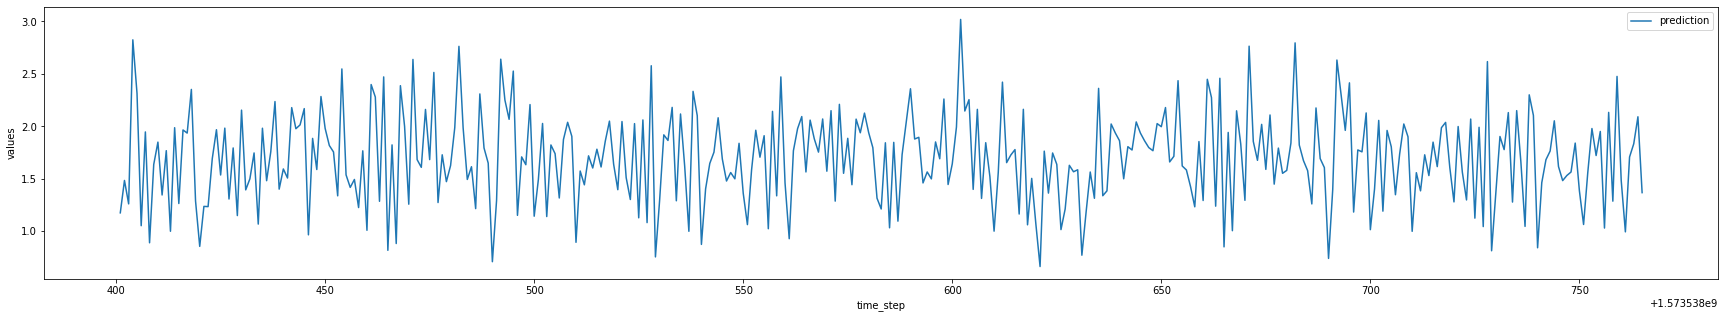

In [81]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 6. Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [82]:
FILENAME_PULL = REPO + 'pull.json'
pull = [json.loads(line) for line in open(FILENAME_PULL)]
df_pull = DataFrame(pull)
a = df_pull[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmputqz0re2', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c3c01a828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5116760e+09, 1.5117624e+09, 1.5118488e+09,
       1.5119352e+09, 1.5120216e+09, 1.5121080e+09, 1.5121944e+09,
       1.5122808e+09, 1.5123672e+09, 1.5124536e+09, 1.5125400e+09,
       1.5126264e+09, 1.5127128e+09, 1.5127992e+09, 1.5128856e+09,
       1.5129720e+09, 1.5130584e+09, 1.5131448e+09, 1.5132312e+09,
       1.5133176e+09, 1.5134040e+09, 1.5134904e+09, 1.5136632e+09,
       1.5137496e+09, 1.5138360e+09, 1.5139224e+09, 1.5140088e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159960e+09,
       1.5160824e+09, 1.5161688e+09, 1.5162552e+09, 1.5163416e+09,
       1.5164280e+09, 1.5165144e+09, 1.5166008e+09, 1.5166872e+09,
       1.5167736e+09, 1.5168600e+09, 1.5169464e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmputqz0re2/model.ckpt.
INFO:tensorflow:loss = 1.5136665, step = 1
INFO:tensorflow:global_step/sec: 249.814
INFO:tensorflow:loss = 1.2463199, step = 101 (0.402 sec)
INFO:tensorflow:global_step/sec: 154.937
INFO:tensorflow:loss = 1.1971098, step = 201 (0.645 sec)
INFO:tensorflow:global_step/sec: 163.706
INFO:tensorflow:loss = 1.2310482, step = 301 (0.611 sec)
INFO:tensorflow:global_step/sec: 179.841
INFO:tensorflow:loss = 1.2221328, step = 401 (0.556 sec)
INFO:tensorflow:global_step/sec: 173.404
INFO:tensorflow:loss = 1.2270377, step = 501 (0.576 sec)
INFO:tensorflow:global_step/sec: 181.876
INFO:tensorflow:loss = 1.2061816, step = 601 (0.550 sec)
INFO:tensorflow:global_step/sec: 178.849
INFO:tensorflow:loss = 1.2330797, step = 701 (0.559 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmputqz0re2/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-19:09:01
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.2087007, covariance = [[[ 36.80955  ]
  [ 28.932392 ]
  [ 28.18273  ]
  [ 52.712646 ]
  [ 77.464325 ]
  [ 48.241505 ]
  [ 52.1973   ]
  [ 37.2849   ]
  [ 39.527493 ]
  [ 58.713646 ]
  [ 43.099934 ]
  [ 70.24531  ]
  [ 28.085117 ]
  [ 47.01507  ]
  [ 71.4

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


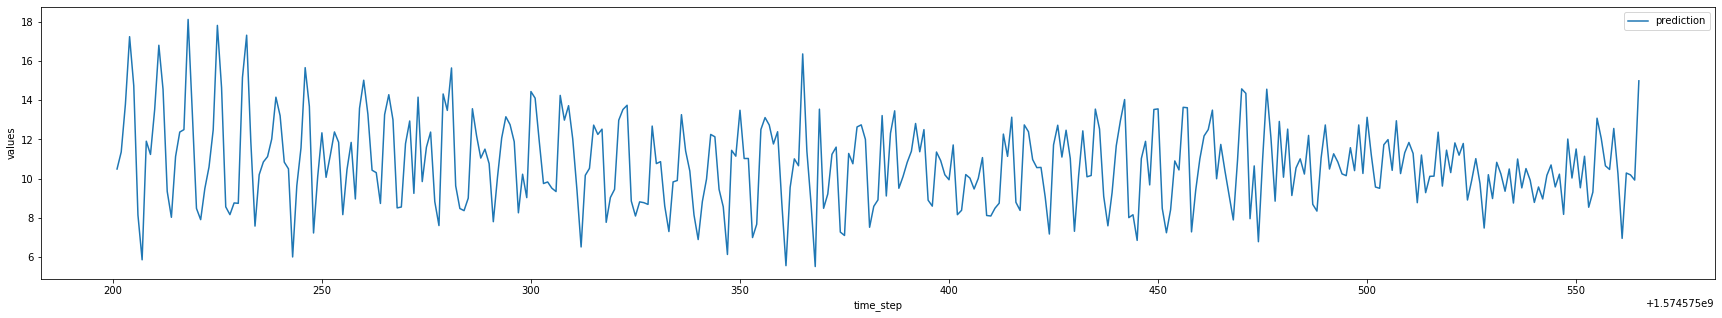

In [83]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 7. Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend,yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [113]:
FILENAME_COMMITS = REPO + 'commits.json'
commits = [json.loads(line) for line in open(FILENAME_COMMITS)]
df_commits = DataFrame(commits)
a = df_commits[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpka7g62qo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c47f85eb8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpka7g62qo/model.ckpt.
INFO:tensorflow:loss = 1.6000726, step = 1
INFO:tensorflow:global_step/sec: 226.591
INFO:tensorflow:loss = 1.2285973, step = 101 (0.443 sec)
INFO:tensorflow:global_step/sec: 168.503
INFO:tensorflow:loss = 1.1930349, step = 201 (0.594 sec)
INFO:tensorflow:global_step/sec: 159.574
INFO:tensorflow:loss = 1.1419085, step = 301 (0.627 sec)
INFO:tensorflow:global_step/sec: 164.184
INFO:tensorflow:loss = 1.1974895, step = 401 (0.609 sec)
INFO:tensorflow:global_step/sec: 169.236
INFO:tensorflow:loss = 1.1680626, step = 501 (0.591 sec)
INFO:tensorflow:global_step/sec: 191.381
INFO:tensorflow:loss = 1.1695548, step = 601 (0.523 sec)
INFO:tensorflow:global_step/sec: 184.968
INFO:tensorflow:loss = 1.1267747, step = 701 (0.541 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpka7g62qo/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:22:03
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1381288, covariance = [[[  91.883736 ]
  [  47.579777 ]
  [ 192.84923  ]
  [ 229.28477  ]
  [  96.39987  ]
  [  31.220963 ]
  [  49.681114 ]
  [  66.88141  ]
  [  87.941895 ]
  [ 160.56302  ]
  [ 121.71291  ]
  [  99.269226 ]
  [  82.57017  ]
  [  39.030

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


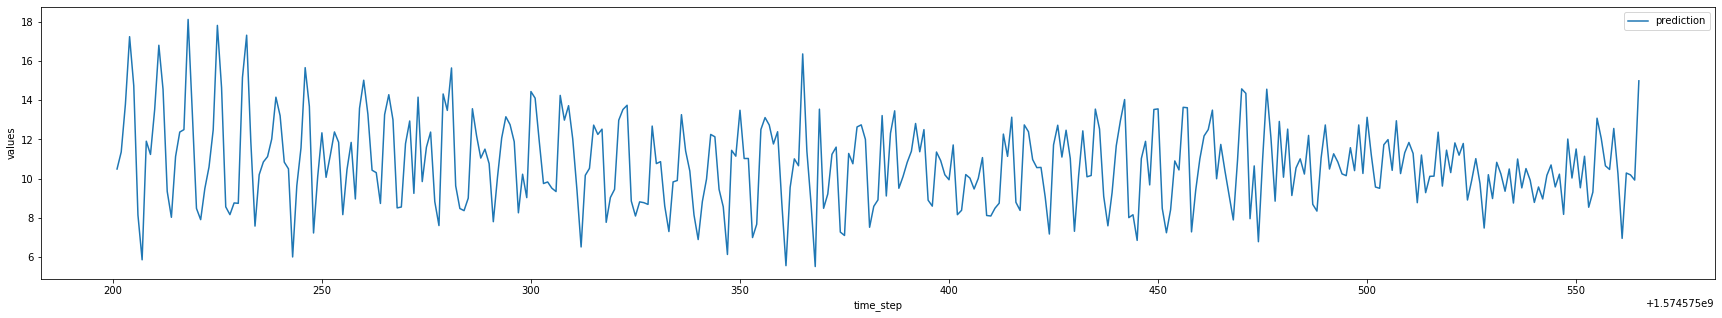

In [84]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 8. Plot the branches forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [115]:
FILENAME_BRANCHES = REPO + 'branches.json'
branches = [json.loads(line) for line in open(FILENAME_BRANCHES)]
df_branches = DataFrame(branches)
a = df_branches[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp2793oset', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c48710a90>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp2793oset/model.ckpt.
INFO:tensorflow:loss = 1.6169066, step = 1
INFO:tensorflow:global_step/sec: 251.393
INFO:tensorflow:loss = 1.1875453, step = 101 (0.399 sec)
INFO:tensorflow:global_step/sec: 161.558
INFO:tensorflow:loss = 1.1655091, step = 201 (0.619 sec)
INFO:tensorflow:global_step/sec: 164.077
INFO:tensorflow:loss = 1.1094636, step = 301 (0.609 sec)
INFO:tensorflow:global_step/sec: 190.671
INFO:tensorflow:loss = 1.144875, step = 401 (0.524 sec)
INFO:tensorflow:global_step/sec: 174.154
INFO:tensorflow:loss = 1.1671832, step = 501 (0.574 sec)
INFO:tensorflow:global_step/sec: 193.353
INFO:tensorflow:loss = 1.1271977, step = 601 (0.517 sec)
INFO:tensorflow:global_step/sec: 188.516
INFO:tensorflow:loss = 1.1609006, step = 701 (0.530 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmp2793oset/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:24:18
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1278881, covariance = [[[ 83.82928  ]
  [ 49.067566 ]
  [316.59982  ]
  [267.6054   ]
  [ 92.08097  ]
  [ 40.538715 ]
  [ 55.963577 ]
  [ 69.41838  ]
  [127.39659  ]
  [258.93008  ]
  [179.48611  ]
  [151.12697  ]
  [ 89.962715 ]
  [ 38.329018 ]
  [ 71.0

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


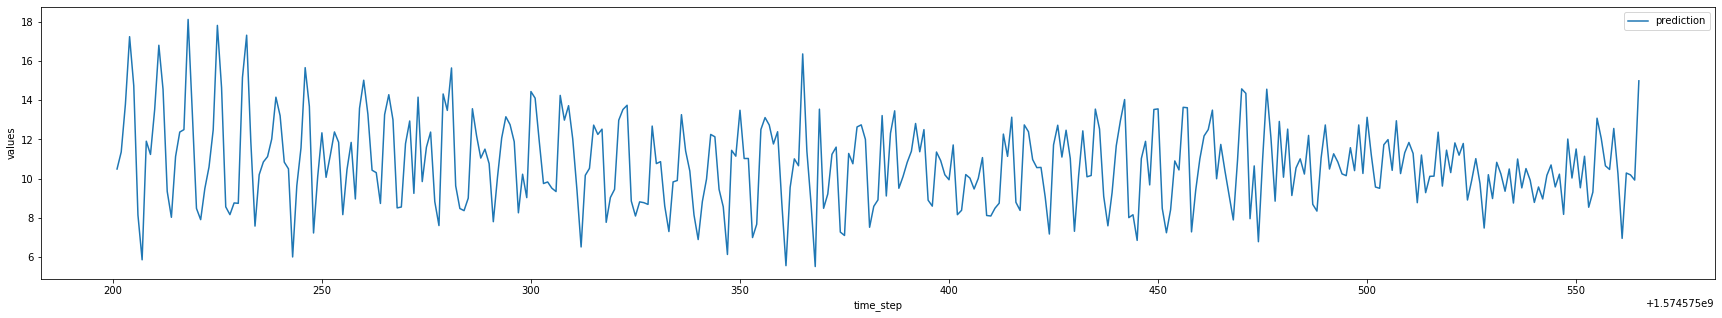

In [85]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 9. Plot the contributors forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [117]:
FILENAME_CONTRIBUTORS = REPO + 'contributors.json'
contributors = [json.loads(line) for line in open(FILENAME_CONTRIBUTORS)]
df_contributors = DataFrame(contributors)
a = df_contributors[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpzvqkqt2o', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c49e007f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpzvqkqt2o/model.ckpt.
INFO:tensorflow:loss = 1.5087684, step = 1
INFO:tensorflow:global_step/sec: 227.938
INFO:tensorflow:loss = 1.1456523, step = 101 (0.441 sec)
INFO:tensorflow:global_step/sec: 165.713
INFO:tensorflow:loss = 1.1694304, step = 201 (0.603 sec)
INFO:tensorflow:global_step/sec: 162.037
INFO:tensorflow:loss = 1.1051112, step = 301 (0.617 sec)
INFO:tensorflow:global_step/sec: 170.635
INFO:tensorflow:loss = 1.1444546, step = 401 (0.586 sec)
INFO:tensorflow:global_step/sec: 172.248
INFO:tensorflow:loss = 1.1451724, step = 501 (0.580 sec)
INFO:tensorflow:global_step/sec: 183.193
INFO:tensorflow:loss = 1.1459644, step = 601 (0.546 sec)
INFO:tensorflow:global_step/sec: 181.321
INFO:tensorflow:loss = 1.1581913, step = 701 (0.552 sec)
INFO:tensorflow:global_step/sec:

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpzvqkqt2o/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:25:26
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.1238458, covariance = [[[ 86.776695 ]
  [ 48.884663 ]
  [318.3489   ]
  [250.03424  ]
  [ 98.62894  ]
  [ 37.01128  ]
  [ 55.92279  ]
  [ 73.92956  ]
  [130.23418  ]
  [237.03192  ]
  [178.64835  ]
  [153.94547  ]
  [ 92.17411  ]
  [ 39.309063 ]
  [ 71.6

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


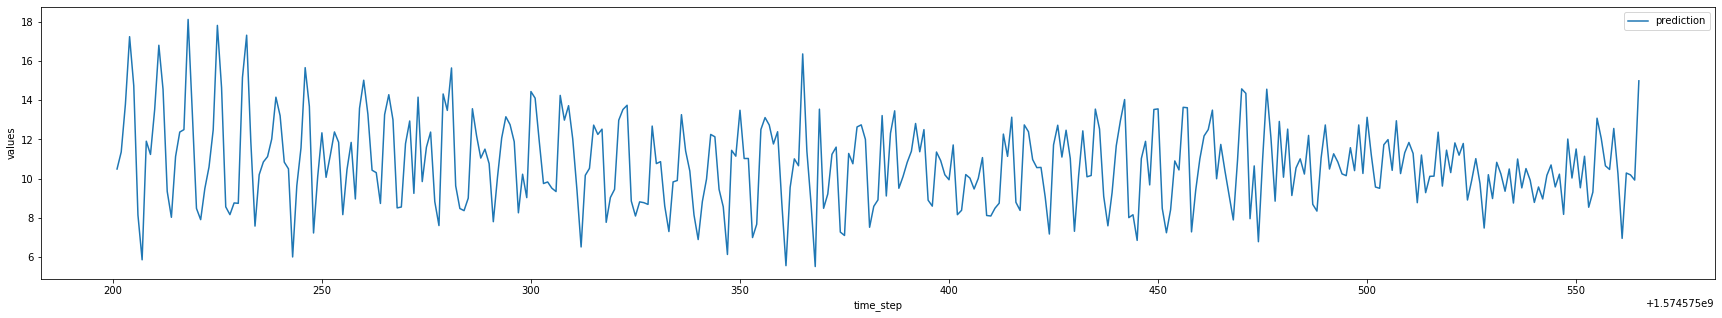

In [86]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### 10 Plot the releases forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

In [119]:
FILENAME_RELEASES = REPO + 'releases.json'
releases = [json.loads(line) for line in open(FILENAME_RELEASES)]
df_releases = DataFrame(releases)
a = df_releases[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
array = b.values
x = np.array([time.mktime(i[0].timetuple()) for i in array])
y = np.array([i[1] for i in array])
data = {
    tf.contrib.timeseries.TrainEvalFeatures.TIMES: x,
    tf.contrib.timeseries.TrainEvalFeatures.VALUES: y,
}
print (data)

reader = NumpyReader(data)

train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(reader, batch_size = 40, window_size = 40)
ar = tf.contrib.timeseries.ARRegressor(
        periodicities=200, input_window_size=30, output_window_size=10,
        num_features=1,
        loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)
ar.train(input_fn=train_input_fn, steps=6000)

evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)
evaluation = ar.evaluate(input_fn=evaluation_input_fn, steps=1000)
(predictions,) = tuple(ar.predict(
        input_fn=tf.contrib.timeseries.predict_continuation_input_fn(
            evaluation, steps=365)))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpudi1s_73', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1c4974a4a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


{'times': array([1.5115032e+09, 1.5115896e+09, 1.5116760e+09, 1.5117624e+09,
       1.5118488e+09, 1.5119352e+09, 1.5120216e+09, 1.5121080e+09,
       1.5121944e+09, 1.5122808e+09, 1.5123672e+09, 1.5124536e+09,
       1.5125400e+09, 1.5126264e+09, 1.5127128e+09, 1.5127992e+09,
       1.5128856e+09, 1.5129720e+09, 1.5130584e+09, 1.5131448e+09,
       1.5132312e+09, 1.5133176e+09, 1.5134040e+09, 1.5134904e+09,
       1.5135768e+09, 1.5136632e+09, 1.5137496e+09, 1.5138360e+09,
       1.5139224e+09, 1.5140088e+09, 1.5140952e+09, 1.5141816e+09,
       1.5142680e+09, 1.5143544e+09, 1.5144408e+09, 1.5145272e+09,
       1.5146136e+09, 1.5147000e+09, 1.5147864e+09, 1.5148728e+09,
       1.5149592e+09, 1.5150456e+09, 1.5151320e+09, 1.5152184e+09,
       1.5153048e+09, 1.5153912e+09, 1.5154776e+09, 1.5155640e+09,
       1.5156504e+09, 1.5157368e+09, 1.5158232e+09, 1.5159096e+09,
       1.5159960e+09, 1.5160824e+09, 1.5161688e+09, 1.5162552e+09,
       1.5163416e+09, 1.5164280e+09, 1.5165144e+09, 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpudi1s_73/model.ckpt.
INFO:tensorflow:loss = 1.5321372, step = 1
INFO:tensorflow:global_step/sec: 245.675
INFO:tensorflow:loss = 1.1363204, step = 101 (0.408 sec)
INFO:tensorflow:global_step/sec: 166.953
INFO:tensorflow:loss = 1.1490993, step = 201 (0.599 sec)
INFO:tensorflow:global_step/sec: 162.883
INFO:tensorflow:loss = 1.1586791, step = 301 (0.614 sec)
INFO:tensorflow:global_step/sec: 170.07
INFO:tensorflow:loss = 1.1294749, step = 401 (0.588 sec)
INFO:tensorflow:global_step/sec: 165.271
INFO:tensorflow:loss = 1.0998207, step = 501 (0.605 sec)
INFO:tensorflow:global_step/sec: 173.921
INFO:tensorflow:loss = 1.1337899, step = 601 (0.575 sec)
INFO:tensorflow:global_step/sec: 176.365
INFO:tensorflow:loss = 1.1359555, step = 701 (0.567 sec)
INFO:tensorflow:global_step/sec: 

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/bb/fnxzw_ss5456whl7s1d5hdf80000gn/T/tmpudi1s_73/model.ckpt-6000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-11-24-17:27:07
INFO:tensorflow:Saving dict for global step 6000: average_loss = 1.126786, covariance = [[[ 87.17587 ]
  [ 47.165634]
  [295.3349  ]
  [265.49072 ]
  [ 94.228035]
  [ 38.263905]
  [ 53.441906]
  [ 72.649155]
  [126.010796]
  [225.81271 ]
  [175.35085 ]
  [150.50969 ]
  [100.72095 ]
  [ 38.68181 ]
  [ 75.20317 ]
  [201.8

INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Summary for np.ndarray is not visible in Tensorboard by default. Consider using a Tensorboard plugin for visualization (see https://github.com/tensorflow/tensorboard-plugin-example/blob/master/README.md for more information).
INFO:tensorflow:Saving 'checkpoi

INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


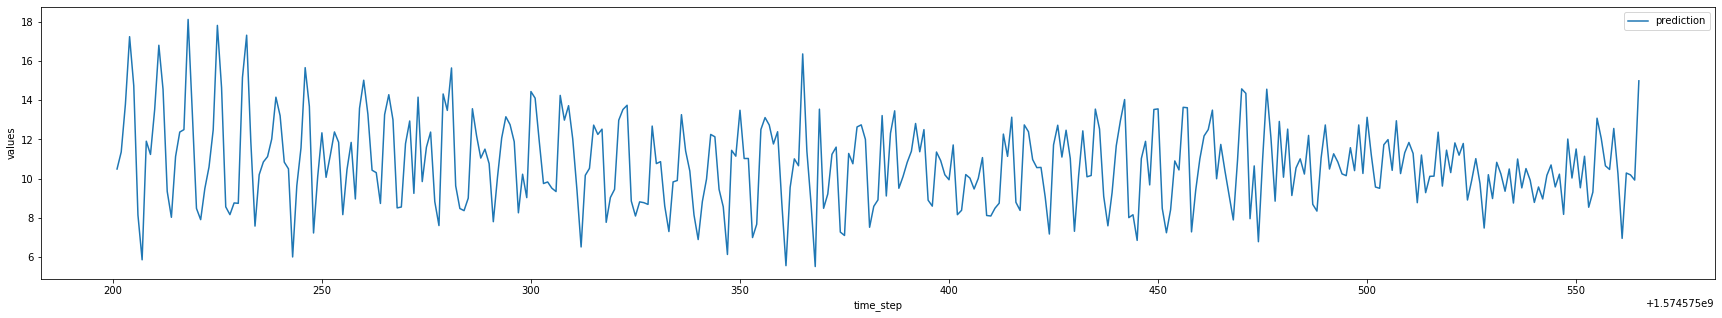

In [87]:
plt.figure(figsize=(30, 5))
plt.plot(predictions['times'].reshape(-1), predictions['mean'].reshape(-1), label='prediction')
plt.xlabel('time_step')
plt.ylabel('values')
plt.legend()
plt.show()

### StatsModel

### 1) The day of the week maximum number of issues created

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



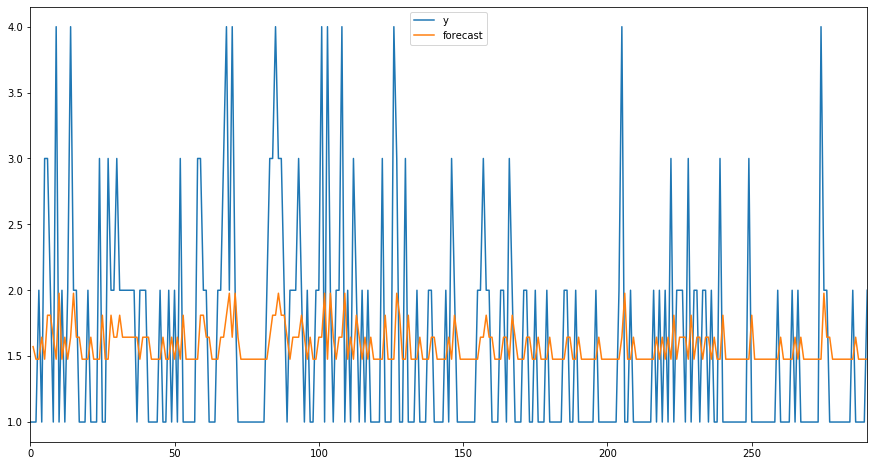

In [89]:
#FILENAME_ISSUES = 'angular_angular.json'
#issues = [json.loads(line) for line in open(FILENAME_ISSUES)]
#df = DataFrame(issues)
a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
df2 = b
model = sm.tsa.ARIMA(df2['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df2['forecast'] = results.fittedvalues
df2[['y', 'forecast']].plot(figsize=(15,8))

### From the graph we can know the day of the week maximum number of issues created is Wednesday

### 2. The day of the week maximum number of issues closed

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



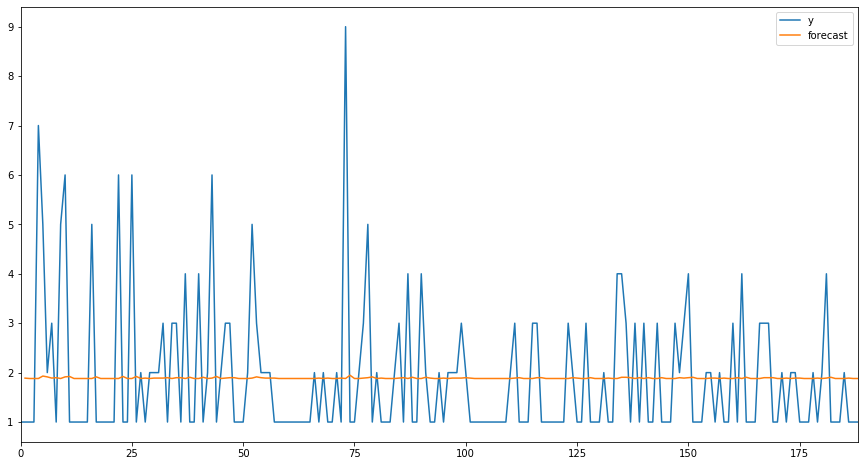

In [90]:
df = DataFrame(issues)
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
df2 = b
model = sm.tsa.ARIMA(df2['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df2['forecast'] = results.fittedvalues
df2[['y', 'forecast']].plot(figsize=(15,8))

### From the graph we can know the day of the week maximum number of issues created is Thursday

### 3. The month of the year that has maximum number of issues closed

#### From the graph we can know the month of the year that has maximum number of issues closed are January

### 4. Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



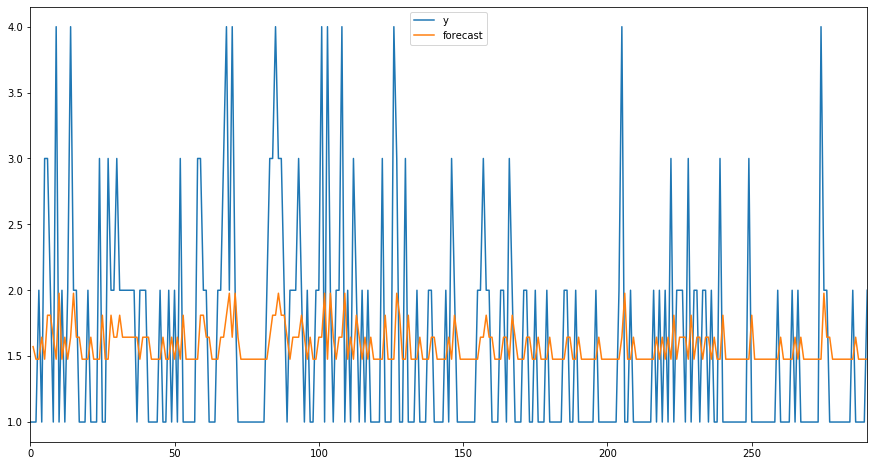

In [92]:

a = df[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
df2 = b
model = sm.tsa.ARIMA(df2['y'].iloc[1:], order = (1, 0, 0))
results = model.fit()
df2['forecast'] = results.fittedvalues
df2[['y', 'forecast']].plot(figsize=(15,8))

### 5. Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



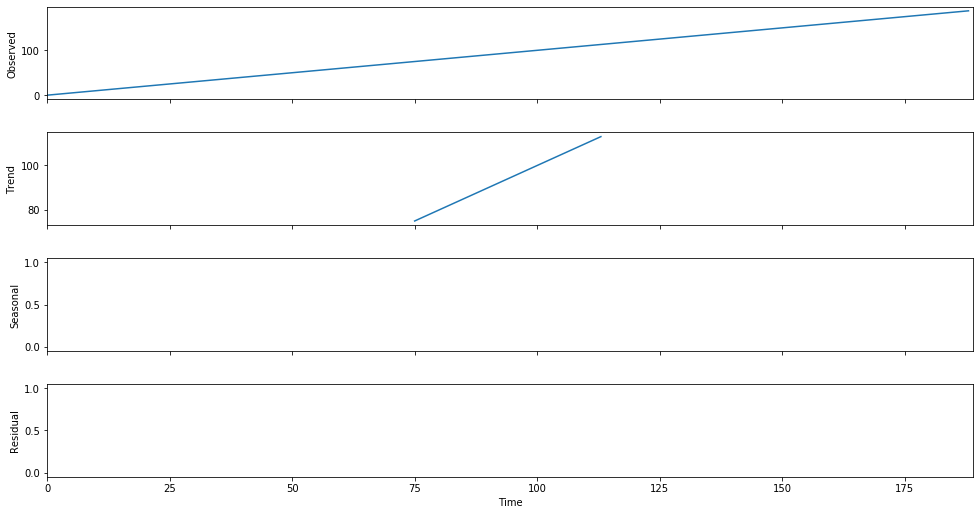

In [97]:
a = df[['closed_at']]
a['count'] = 0
b = a.groupby(by=['closed_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 6. Plot the pulls forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly

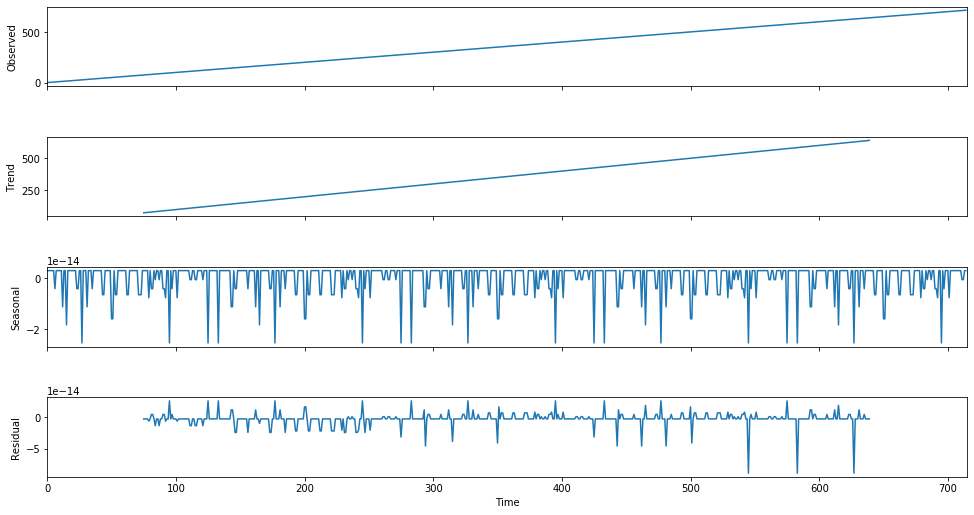

In [98]:
a = df_pull[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 7. Plot the commits forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

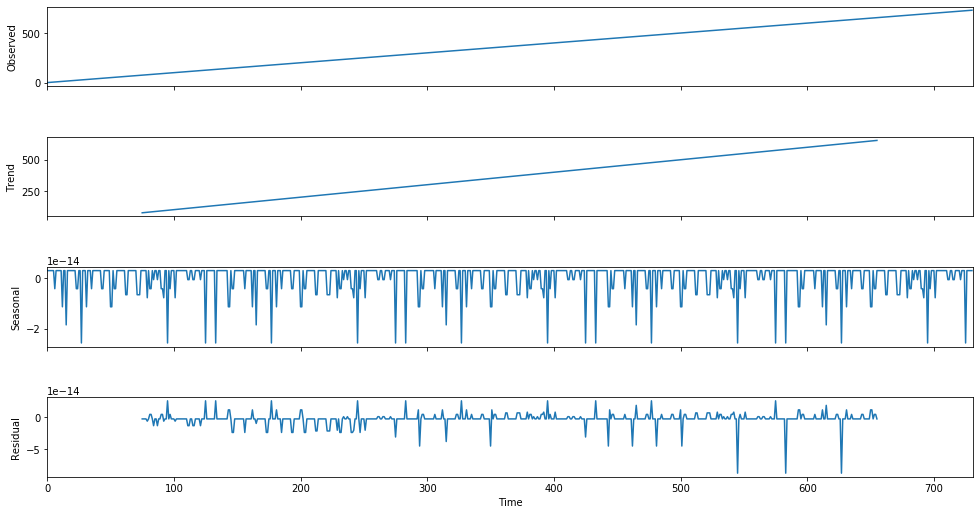

In [144]:
a = df_commits[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 8. Plot the branches forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

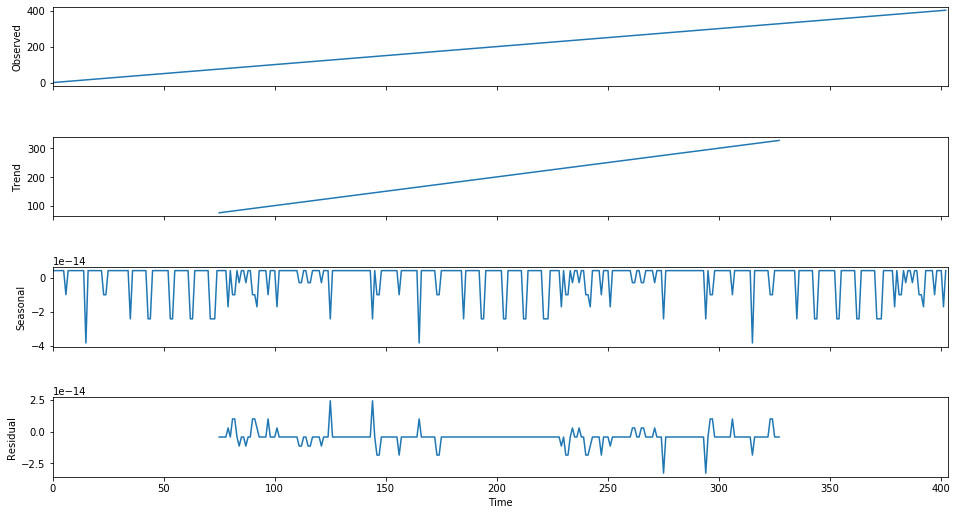

In [99]:
FILENAME_BRANCHES = REPO + 'branches.json'
branches = [json.loads(line) for line in open(FILENAME_BRANCHES)]
df_branches = DataFrame(branches)
a = df_branches[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 9. Plot the contributors forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

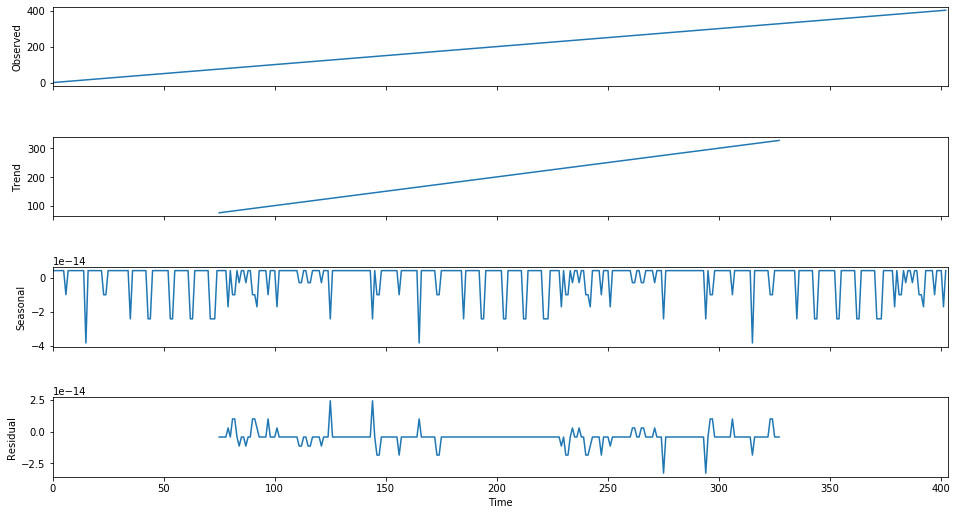

In [100]:
a = df_contributors[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)

### 10. Plot the releases forecast; use the Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too.

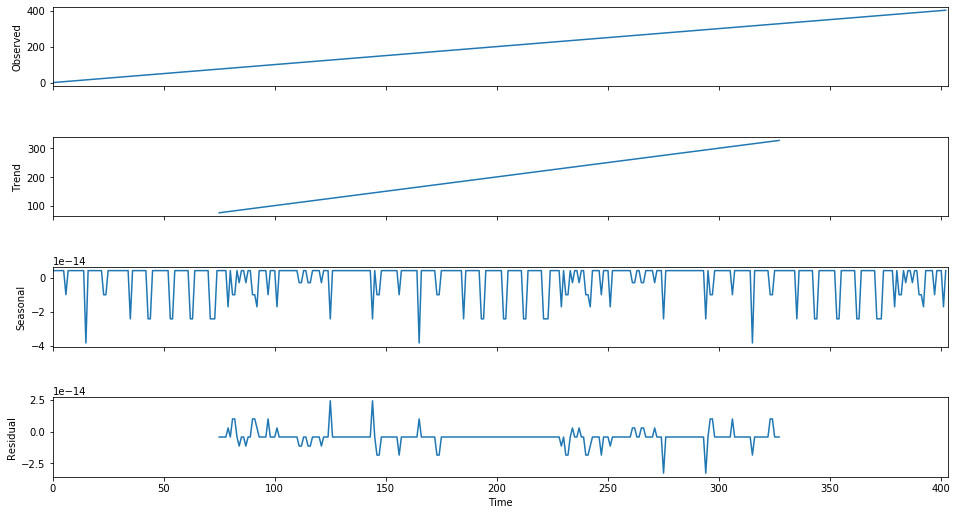

In [101]:
a = df_releases[['created_at']]
a['count'] = 0
b = a.groupby(by=['created_at'],as_index=False).count()
b.columns = ['ds', 'y']
b['ds'] = b['ds'].astype('datetime64[ns]')
b.set_index('ds')
predict = sm.tsa.seasonal_decompose(b.index, freq=150)
figure = predict.plot()
figure.set_size_inches(15, 8)